# Аналитика данных с помощью `pandas` и `matplotlib`

**Дедлайн:** 8 апреля 23:59

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [1]:
%%bash
pip3 install --upgrade mplfinance
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.3 MB/s eta 0:00:00


Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 151MB/s]


Начнем с необходимых приготовлений.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator)
import matplotlib.dates as dts
import datetime
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [3]:
# Paste your code here.
coins = pd.read_csv('coins.csv')
coins.set_index('date', inplace=True)

Посмотрим что получилось

In [4]:
coins.head(6)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07
2013-04-30,144.00,47450.0,8.426632e+07,76871.0,BTC,Bitcoin,144.00,146.93,134.05,139.00,0.0,1.597780e+09
2013-04-30,4.40,9099.0,4.039166e+07,17810.0,LTC,Litecoin,4.40,4.57,4.17,4.30,0.0,7.572680e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [5]:
print(coins["name"].nunique())

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
print(min(coins.index.values), ' - ', max(coins.index.values))

2013-04-28  -  2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
df = [i for i in coins.isnull().sum().reset_index().values.tolist() if i[1] != 0]
print(f"{'Column' : ^20}{'NaN quantity': ^12}\n{'-' * 32}")
for i in df: print(f'{i[0]:20}{i[1]:8d}')

       Column       NaN quantity
--------------------------------
price                    327
txCount                 1520
txVolume                1830
activeAddresses         1520


Для того чтобы понять природу пропусков в данных, определим, где эти пропуски были обнаружены. Количество транзакций в сети в данный момент - количество транзакций или взаимодействий, которые происходят в конкретной сети блокчейна. Пропуски данных в данной колонке можно обюяснить отсутствием каких-либо транзакций (если нет данных в этой колонке, то данных в колонке о переводах между адресами тоже нет - логично). Если же отсутствуют данные об объемах монет, переведенных между адресами, то можно предположить, что данные транзакции не были занесены в реестры (офчейн платежи).

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
print(coins.loc[coins['high'] == coins['high'].max()]['name'].squeeze(), ' ', coins.index[coins['high'] == coins['high'].max()]. tolist ()[0])

Bitcoin   2017-12-17


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

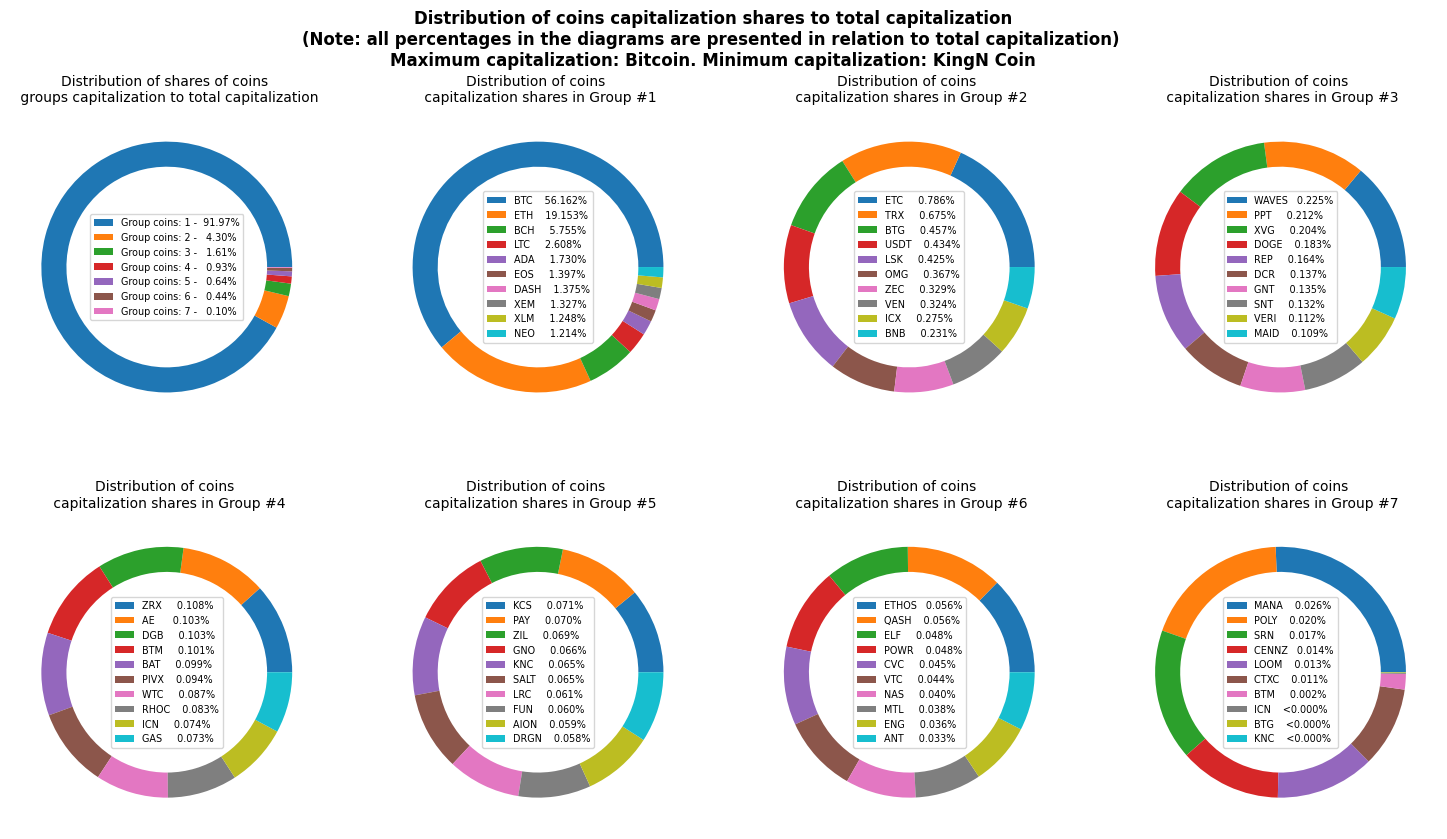

In [ ]:
# DataFrame с сортировкой по 'market'
capex = coins.groupby(['name', 'symbol'])['market'].sum().reset_index().set_index('name').sort_values(by=['market'], ascending = False).reset_index()

capex_full = capex['market'].sum()

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (15,9))
fig.suptitle("Distribution of coins capitalization shares to total capitalization\n"
             "(Note: all percentages in the diagrams are presented in relation to total capitalization) \nMaximum capitalization: "
             + capex.iloc[0]['name'] + '. Minimum capitalization: ' + capex.iloc[len(capex.index)-1]['name'], fontweight ="bold", fontsize='large')
fig.tight_layout()

capex_step = 10

for i in range(len(capex.index)):
    if round((capex.iloc[i]['market'] / capex_full)*100, 3) > 0:
        st = '%-6s %6.3f' % (capex.iloc[i]['symbol'], round((capex.iloc[i]['market'] / capex_full)*100, 3)) + '%'
    else: st = '%-6s %6s' % (capex.iloc[i]['symbol'], '<0.000') + '%'
    capex.loc[i, 'symbol'] = st

i, a, b, g = 0, 0, 1, 1
pp = {}
while i < len(capex.index):
    if i + capex_step > len(capex.index): k = len(capex.index) - 1
    else: k = i+capex_step-1
    capex_plt = capex[i:k+1].set_index('symbol')['market'].to_dict()
    pp['Group coins: %s - %6.2f' % (str(g), round((capex[i:k+1]['market'].sum()
                                                   / capex_full) * 100, 2)) + '%'] = capex[i:k+1]['market'].sum()

    ax[a,b].pie(list(capex_plt.values()), wedgeprops=dict(width=.2))
    ax[a, b].set_title('Distribution of coins \n capitalization shares in Group #' +str(g),fontdict={'fontsize': 10})
    ax[a, b].legend(labels=list(capex_plt.keys()), loc="center", fontsize='x-small')
    if b + 1 > 3: a, b = a + 1, 0
    else: b += 1

    i += capex_step
    g += 1

ax[0, 0].pie(list(pp.values()), wedgeprops=dict(width=.2))
ax[0, 0].set_title('Distribution of shares of coins \n groups capitalization to total capitalization',
                   fontdict={'fontsize': 10, 'fontweight': 'normal'})
ax[0, 0].legend(labels=list(pp.keys()), loc="center", fontsize='x-small')

plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [ ]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    # Paste your code here
    ohlc = coins.query('symbol == @symbol').loc[start_date : end_date, ['open', 'high', 'low', 'close']].reset_index()
    ohlc['date'] = pd.to_datetime(ohlc['date'])
    ohlc['date'] = ohlc['date'].map(dts.date2num)

    # Plot
    fig, ax = plt.subplots(figsize=(16, 8))
    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

    # Title
    fig.suptitle('Stock Prices of ' + symbol, fontweight ="bold", fontsize='large')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price, $')

    ax.grid(True)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim([min(ohlc['date']) - 5, max(ohlc['date']) + 5])
    ax.set_xticks(np.arange(min(ohlc['date']), max(ohlc['date']), 10))
    ax.tick_params(axis='x', labelsize='x-small', rotation=90)

    # Formatting Date
    date_format = dts.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)

    fig.tight_layout()
    plt.show()
    return

Посмотрим, что получилось:

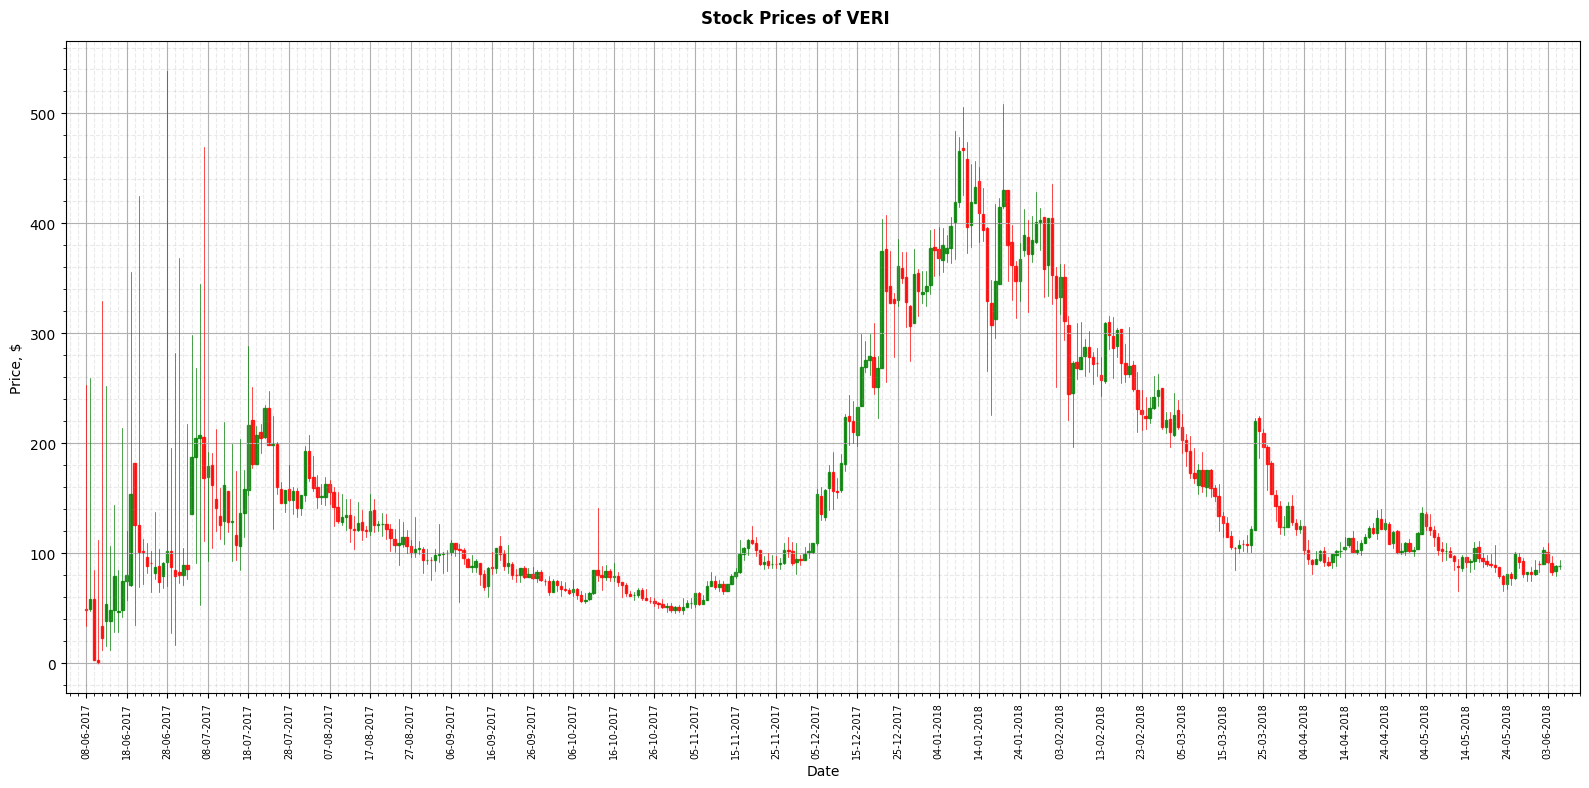

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    # Paste your code here
    df = coins.query('symbol == @symbol').loc[start_date : end_date, ['symbol', 'open', 'high', 'low', 'close']].reset_index()
    df['pnd'] = np.where(df['close'] > df['open'], df['high'] / df['close'], df['high'] / df['open'])
    print('Maximum pnd= ', df.loc[df['pnd'].idxmax(), 'pnd'], '  -  ', df.loc[df['pnd'].idxmax(), 'date'])
    return

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

Maximum pnd=  1.1428940004366206   -   2017-11-29


Сравните эти значения для разных монет:

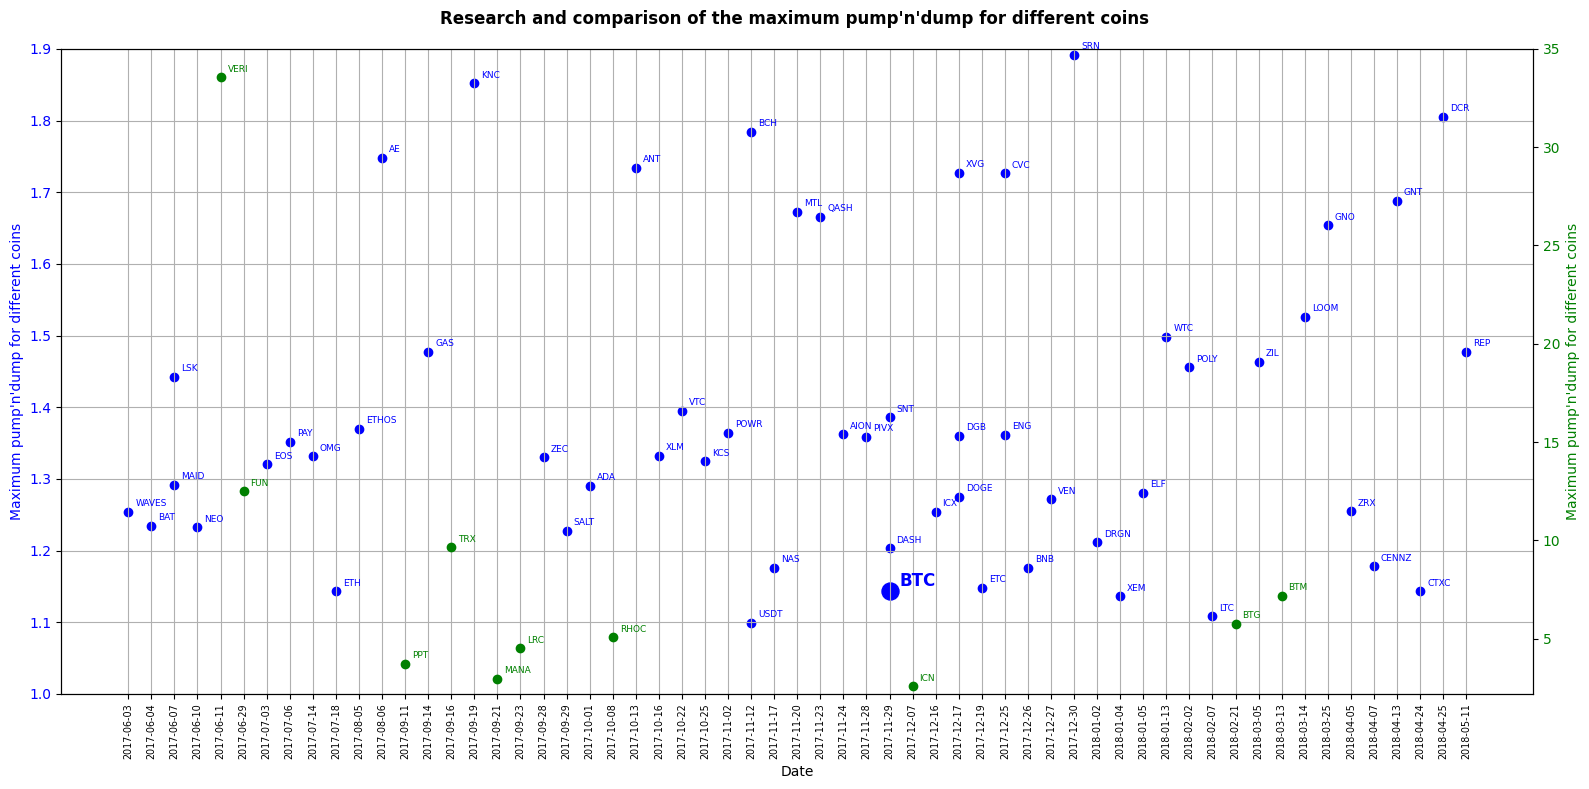

In [ ]:
start_date='2017-06-01'
end_date='2018-06-01'

df = coins.loc['2017-06-01' : '2018-06-01', ['symbol', 'open', 'high', 'low', 'close']].reset_index()
df['pnd'] = np.where(df['close'] > df['open'], df['high'] / df['close'], df['high'] / df['open'])
df = df.loc[df.groupby('symbol')['pnd'].idxmax()].sort_values(by=['date'])
df_btc = df.query('symbol == \'BTC\'').loc[:, ['symbol', 'date', 'pnd']].reset_index()

fig, ax = plt.subplots(figsize=(16, 8))
fig.suptitle('Research and comparison of the maximum pump\'n\'dump for different coins', fontweight ="bold", fontsize='large')
ax2 = ax.twinx()

# Axis
ax.grid(True)
ax.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='green')
ax.set_ylim([1, 1.9])
ax2.set_ylim([2.2, 35])
ax.tick_params(axis='x', labelsize='x-small', rotation=90)

# Label
ax.set_xlabel('Date')
ax.set_ylabel('Maximum pump\'n\'dump for different coins', color='blue')
ax2.set_ylabel('Maximum pump\'n\'dump for different coins', color='green')

# Plot
ax.scatter(df.date, df.pnd, color='blue')
ax.scatter(df_btc.date, df_btc.pnd, color='blue', s=150)
ax2.scatter(df.date, df.pnd, color='green')

# Annotate
for idx, row in df.iterrows():
    if row['symbol'] != 'BTC':
        ax.annotate(row['symbol'], (row['date'], row['pnd']), textcoords='offset points', fontsize=6.5, xytext=(5, 4), color='blue')
    else: ax.annotate(row['symbol'], (row['date'], row['pnd']), textcoords='offset points', fontsize=12, xytext=(7, 4), color='blue', fontweight='bold')
    ax2.annotate(row['symbol'], (row['date'], row['pnd']), textcoords='offset points', fontsize=6.5, xytext=(5, 4), color='green')

fig.tight_layout()
plt.show()

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here
    invest_out = 0
    invest_in = 0
    for i in investments:
        price_in = coins.query('symbol in @i').loc[start_date : start_date, ['close']]['close'].tolist()[0]
        price_out = coins.query('symbol in @i').loc[end_date : end_date, ['close']]['close'].tolist()[0]
        invest_in += investments[i]
        invest_out += (investments[i] / price_in) * price_out
    return round(((invest_out - invest_in)/ invest_in) * 100, 2)

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

7.11

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

5162.77

**ВНИМАНИЕ!** При расчете ROI использована цена **'CLOSE"**

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here
    coin = coins.query('symbol == @symbol').loc[:, ['price']].reset_index()
    coin['mean'] = coin['price'].rolling(window=window).mean()
    coin['std'] = coin['price'].rolling(window=window).std()
    coin['date'] = pd.to_datetime(coin['date']).map(dts.date2num)

    ohlc = coins.query('symbol == @symbol').loc[:, ['open', 'high', 'low', 'close']].reset_index()
    ohlc['date'] = pd.to_datetime(ohlc['date']).map(dts.date2num)

    fig, ax = plt.subplots(figsize=(15, 7))
    fig.suptitle('Technical analysis for ' + symbol, fontweight ="bold", fontsize='large')

    # Axis
    ax.grid(True, which='both', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim([min(ohlc['date']) - 5, max(ohlc['date']) + 5])
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis='x', labelsize='x-small', rotation=90)
    ax.xaxis.set_major_locator(MultipleLocator(5))

    # Plot
    ax.fill_between(coin.date, y1 = coin['mean'] + width*coin['std'], y2 = coin['mean'] - width*coin['std'], color='#D7D7D7')
    ax.plot(coin.date, coin['mean'], color='#5D8AA8', label='MA window={}, witdh={}'.format(window, width))
    ax.plot(coin.date, coin['mean'] + width*coin['std'], color='#AB274F', label='MA window={} + Kq width={}'.format(window, width))
    ax.plot(coin.date, coin['mean'] - width*coin['std'], color='#FFBF00', label='MA window={} - Kq width={}'.format(window, width))
    candlestick_ohlc(ax, ohlc.values, width=0.5, colorup='green', colordown='red', alpha=0.8)

    # Legend
    handles, labels = plt.gca().get_legend_handles_labels()
    line1 = Line2D([0], [0], label='Price Up', color='green')
    line2 = Line2D([0], [0], label='Price Down', color='red')
    handles.extend([line1, line2])
    ax.legend(handles=handles, loc='best')

    # Label
    ax.set_xlabel('Date')
    ax.set_ylabel('Price, $')

    # Formatting Date
    date_format = dts.DateFormatter('%d-%m-%Y')
    ax.xaxis.set_major_formatter(date_format)

    fig.tight_layout()
    plt.show()
    return

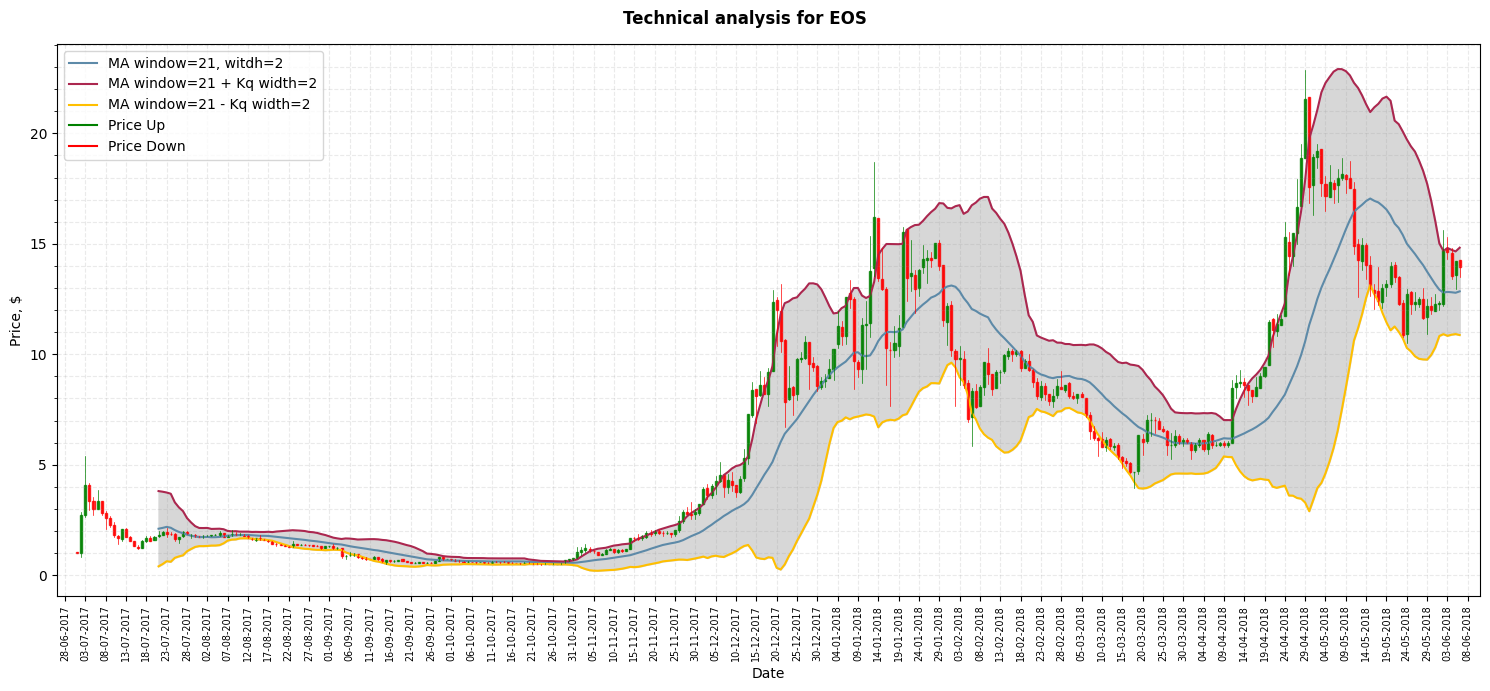

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Правило Боллинджера гласит о том, что 95% времени кривая цены актива должна находиться между нижней и верхней линиями индикатора. Как мы видим из построенного нами графика, кривая цены актива EOS удовлетворяет правилу Боллинджера.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here
     # Create a dataframe with capitalization for selected coins and full capitalization
    coins_select = coins.query('symbol in @symbols').loc[start_date:, ['market']].groupby('date')['market'].sum()
    coins_full = coins.loc[start_date:, ['market']].groupby('date')['market'].sum()
    capex = pd.merge(coins_select, coins_full, left_index=True, right_index=True, suffixes=('_select', '_full'))
    capex['share'] = (capex['market_select'] / capex['market_full']) * 100

    fig, ax = plt.subplots(figsize=(17, 8))
    fig.suptitle(', '.join(symbols) + ' coins capitalization research', fontweight ="bold", fontsize='large')

    # Plot
    ax.plot(capex.market_select, color='#1f77b4')
    ax2 = ax.twinx()
    ax2.plot(capex.share, color='orange')

    # Axis
    ax.grid(True)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim([start_date, max(capex.index.values)])
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.tick_params(axis='x', labelsize='x-small', rotation=90)
    ax.tick_params(axis='y', labelcolor='#1f77b4')
    ax2.tick_params(axis='y', labelcolor='orange')

    # Label
    ax.set_xlabel('Date')
    ax.set_ylabel('Total coins ('+ ', '.join(symbols) +') capitalization $ * 10^11', color='#1f77b4')
    ax2.set_ylabel('Share of coins ('+ ', '.join(symbols) +') capitalizations \nfrom the total market capitalization, %', color='orange')

    fig.tight_layout()
    plt.show()
    return


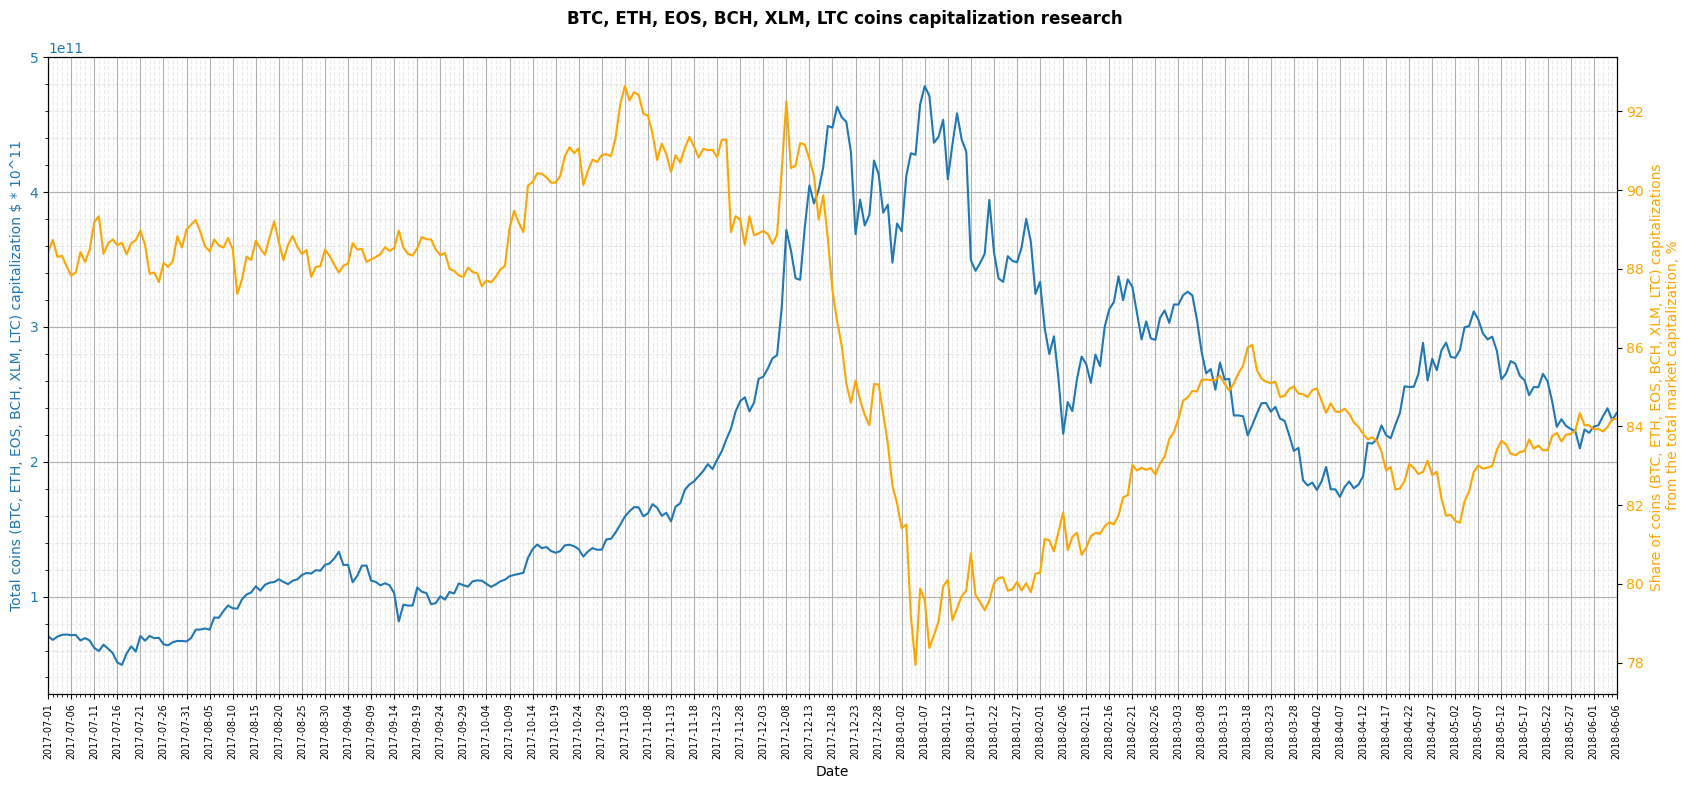

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

**График долей капитализаций монет: BTC, ETH, EOS, BCH, XLM, LTC от общей капитализации рынка по отдельности**

In [ ]:
def plot_custom_coins_capitalizations(coins, symbols, start_date):
    # Create a dataframe with capitalization for selected coins and full capitalization
    coins_full = coins.loc[start_date:, ['market']].groupby('date')['market'].sum()

    def get_share_coins(symb):
        df = pd.merge(coins.query('symbol == @symb').loc[start_date:, ['market']].groupby('date')['market'].sum(),
                      coins_full, left_index=True, right_index=True, suffixes=('_{}'.format(symb), '_full'))
        df['share'] = (df['market_{}'.format(symb)] / df['market_full']) * 100
        return df

    fig, ax = plt.subplots(figsize=(17, 8))
    fig.suptitle(', '.join(symbols) + ' coins capitalization research', fontweight ="bold", fontsize='large')

    # Plot
    for i in symbols:
        capex = get_share_coins(i)
        ax.plot(capex.share, label='Share of {} capitalization'.format(i))

    # Axis
    ax.grid(True)
    ax.minorticks_on()
    ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.2)
    ax.set_xlim([start_date, max(capex.index.values)])
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.tick_params(axis='x', labelsize='x-small', rotation=90)

    # Label & Legend
    ax.legend(loc='best')
    ax.set_xlabel('Date')
    ax.set_ylabel('Share of coins capitalizations from the total market capitalization, %')

    fig.tight_layout()
    plt.show()
    return

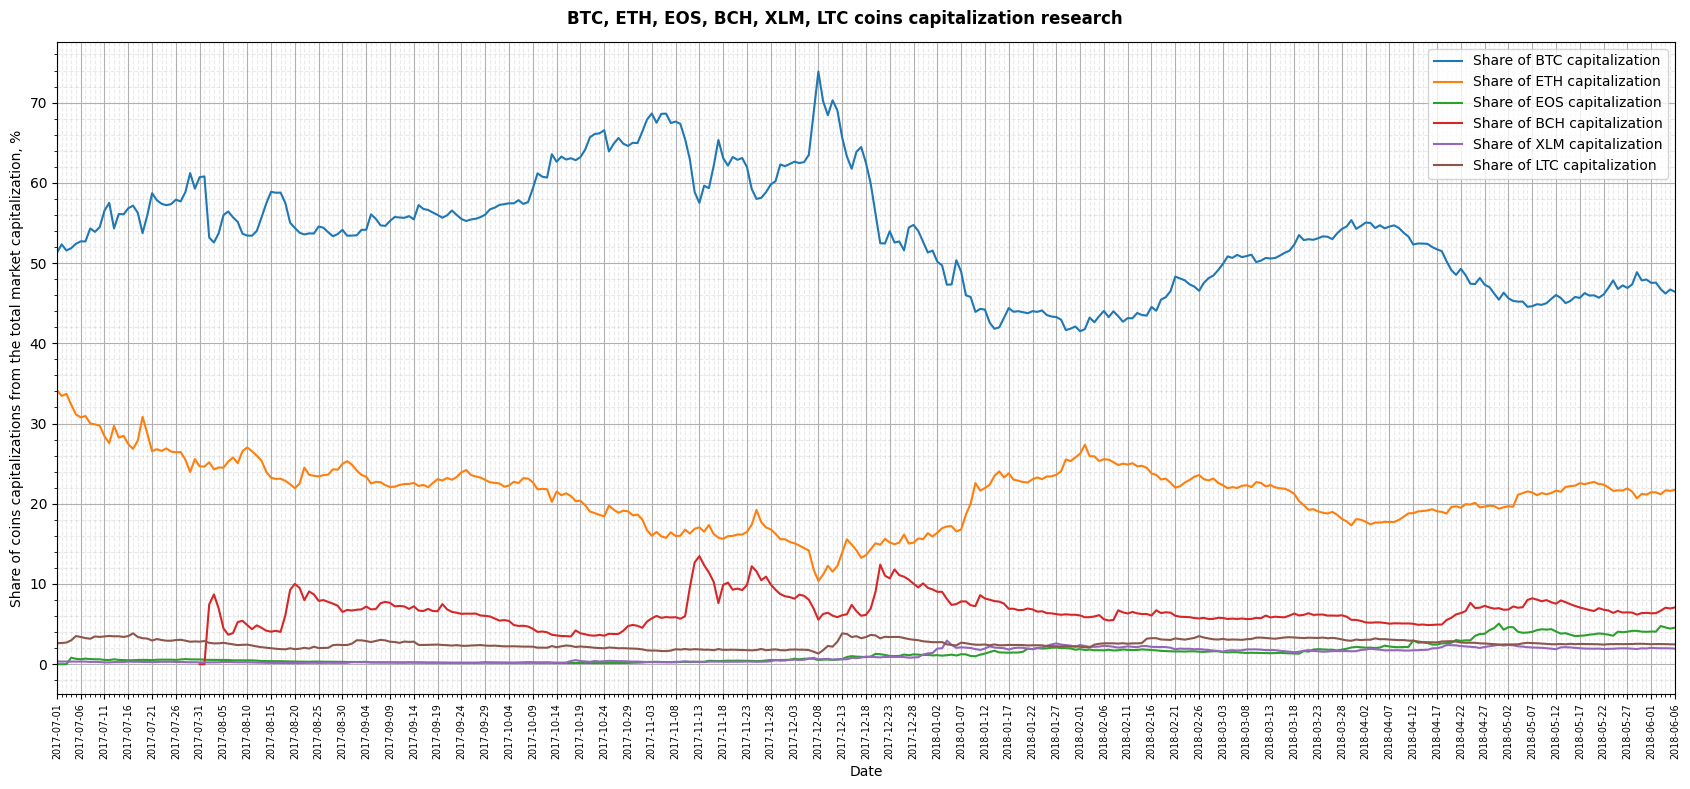

In [ ]:
plot_custom_coins_capitalizations(coins=coins, symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'), start_date='2017-07-01')

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

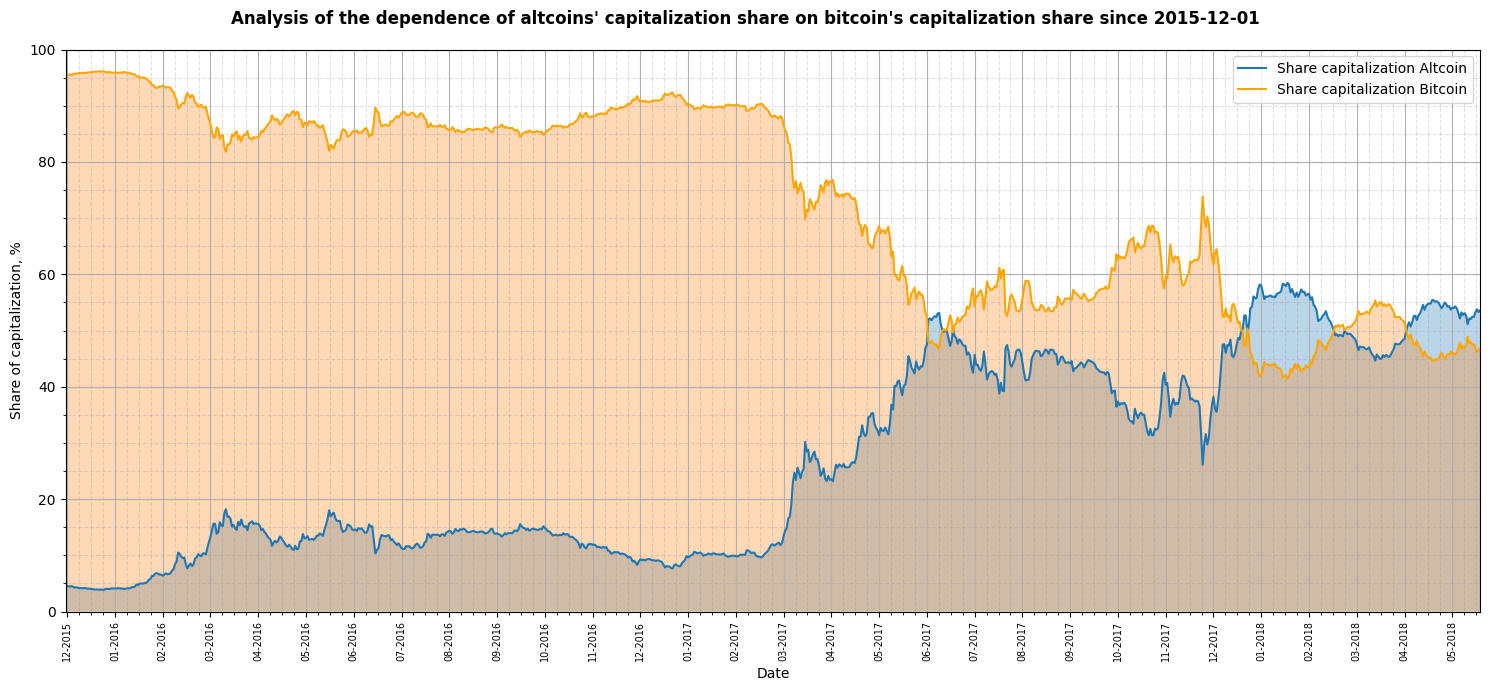

In [ ]:
s , start_date = 'BTC', '2015-12-01'
df = pd.merge(coins.query('symbol == @s').loc[start_date:, ['symbol', 'market']].groupby('date')['market'].sum(),
              coins.loc[start_date:, ['market']].groupby('date')['market'].sum(),
              left_index=True, right_index=True, suffixes=('_btc', '')).reset_index()
df['share_btc_full'] = (df['market_btc'] / df['market']) * 100
df['share_alt_full'] = ((df['market'] - df['market_btc']) / df['market']) * 100
df['date'] = pd.to_datetime(df['date']).map(dts.date2num)

fig, ax = plt.subplots(figsize=(15, 7))
fig.suptitle('Analysis of the dependence of altcoins\' capitalization share on bitcoin\'s capitalization share since ' + start_date,
             fontweight ="bold", fontsize='large')

# Plot
ax.plot(df.date, df.share_alt_full, color='#1f77b4', label='Share capitalization Altcoin')
ax.fill_between(df.date, df.share_alt_full, alpha=.3)
ax.plot(df.date, df.share_btc_full, color='orange', label='Share capitalization Bitcoin')
ax.fill_between(df.date, df.share_btc_full, alpha=.3)
ax.set_xlim(min(df['date']), max(df['date']))

# Axis
ax.grid(True)
ax.minorticks_on()
ax.grid(True, which='minor', color='#999999', linestyle='--', alpha=0.3)
ax.set_xlim([min(df['date']), max(df['date'])])
ax.set_ylim([0, 100])
ax.xaxis.set_major_locator(MultipleLocator(31))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(axis='x', labelsize='x-small', rotation=90)

# Formatting Date
date_format = dts.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_format)

#Label @ Legend
ax.legend(loc='best')
ax.set_xlabel('Date')
ax.set_ylabel('Share of capitalization, %')

fig.tight_layout()
plt.show()

Анализируя зависимость доли капитализации альткоинов от доли капитализации биткоинов, можно сделать следующий вывод. Исходя из построенного нами графика мы видим, что биткоин является так называемым "толчком" для альткоинов. Например, наблюдаемый трейдерами стабильный рост доли капитализации биткоина по конец 2016 года привлекал внимание трейдеров к альтернативной криптовалюте. Это послужило росту доли капитализации альткионов, так как трейдеры стали "переключаться" с дорогого биткоина на более дешевые альтернативы, веря в их аналогичный рост в будущем. Далее, как только доля капитализации альткоинов превысила долю капитализации биткоина (середина июня 2017 года), трейдеры вернулись к биткоину. Подобная тенденция продолжалась до конца рассматривоемого нами периода, однако колебания долей капитализации становились меньше. Таким образом, можно сделать предположение, что в будущем доли капитализации биткоина и альткоинов сравняются.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here
    df = pd.DataFrame()
    coins_full = coins.loc[:date, ['market']].groupby('date')['market'].sum()

    for i in symbols:
        coin = pd.merge(coins.query('symbol == @i').loc[:date, ['market']],
                        coins_full, left_index=True, right_index=True, suffixes=('_select', '_full'))
        coin['share'] = coin['market_select'] / coin['market_full']

        if df.empty: df = coin['share'].ewm(min_periods = window,
                    alpha = alpha).mean().reset_index().set_index('date').rename(columns = {'share' : i})
        else: df = pd.concat([df, coin['share'].ewm(min_periods = window,
                    alpha = alpha).mean().reset_index().set_index('date').rename(columns = {'share' : i})], axis=1)
    return df.corr()

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
#correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

correlations.style.format(precision=2).background_gradient(cmap='coolwarm')

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.92,-0.70,0.03,-0.70,0.17,-0.88
ETH,-0.92,1.00,-0.03,-0.44,0.49,0.24,0.53
EOS,-0.70,-0.03,1.00,-0.03,0.84,0.34,0.46
BCH,0.03,-0.44,-0.03,1.00,-0.07,-0.15,0.08
XLM,-0.70,0.49,0.84,-0.07,1.00,0.32,0.84
LTC,0.17,0.24,0.34,-0.15,0.32,1.00,0.49
ADA,-0.88,0.53,0.46,0.08,0.84,0.49,1.00


Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
#correlations.style.background_gradient(cmap='coolwarm')#.set_precision(2)

correlations.style.format(precision=2).background_gradient(cmap='coolwarm')

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1.00,-0.96,0.01,-0.05,-0.27,0.23,-0.49
ETH,-0.96,1.00,-0.20,-0.44,0.50,0.12,-0.63
EOS,0.01,-0.20,1.00,0.62,0.74,0.47,0.91
BCH,-0.05,-0.44,0.62,1.00,0.36,-0.04,0.30
XLM,-0.27,0.50,0.74,0.36,1.00,0.33,0.97
LTC,0.23,0.12,0.47,-0.04,0.33,1.00,0.88
ADA,-0.49,-0.63,0.91,0.30,0.97,0.88,1.00


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

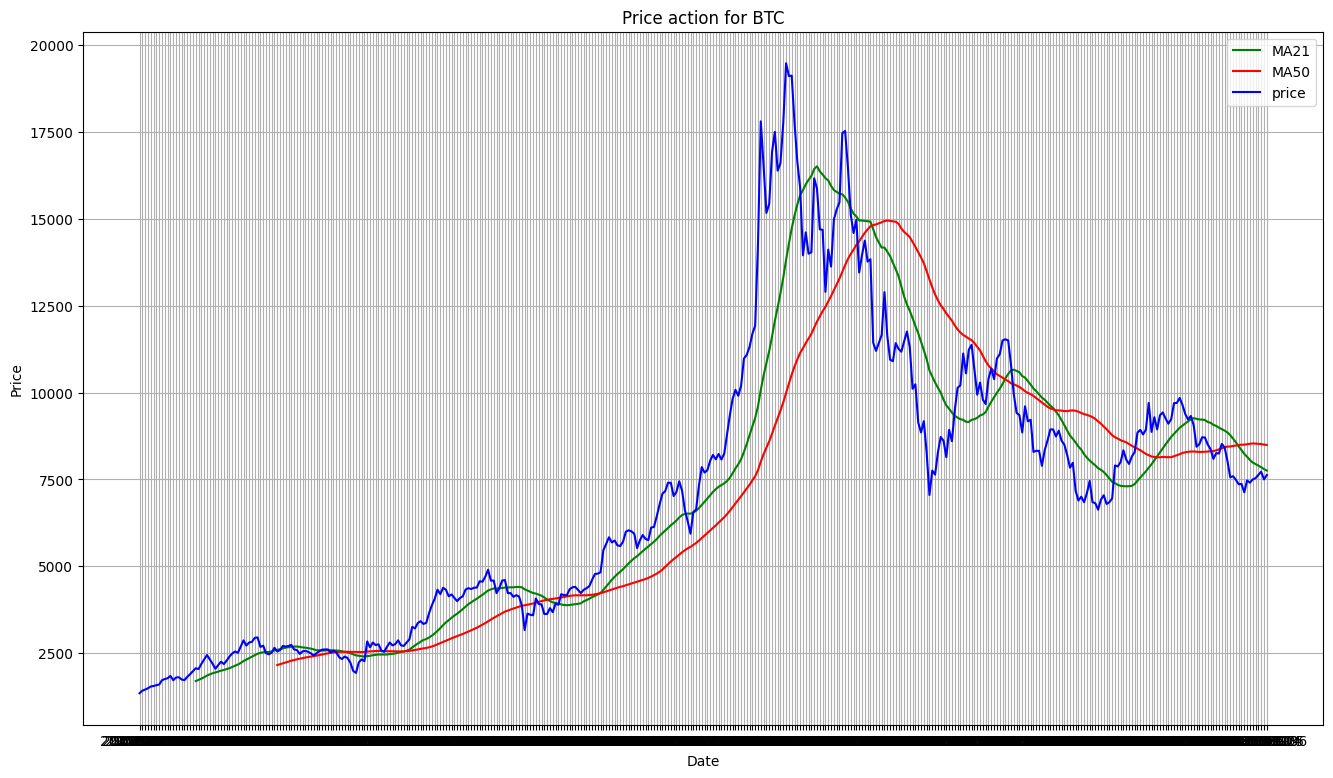

In [6]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [7]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    start_date = pd.Timestamp(start_date).strftime('%Y-%m-%d')
    end_date = pd.Timestamp(end_date).strftime('%Y-%m-%d')
    # Left Figure
    coins_select = coins[coins['symbol'] == symbol][start_date:end_date]
    coins_price_close = coins_select['close']
    multiplier, total = coins_price_close / coins_price_close.shift(1), (coins_price_close / coins_price_close.shift(1)).cumprod()
    custom_strategy = total.copy()
    amount, quantity = 0, 0
    leading_move = coins_price_close.rolling(window=lead_window).mean()
    lagging_move = coins_price_close.shift(1).rolling(window=lag_window).mean()
    for i in range(len(coins_select)):
        if leading_move[i] - lagging_move[i] >= threshold: amount, quantity = amount + coins_price_close[i], quantity + 1
        custom_strategy[i] = (quantity * coins_price_close[i]) / amount

    # Right Figure
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['close']
    leading_mean = price.rolling(window=lead_window).mean()
    lagging_mean = price.rolling(window=lag_window).mean()

    fig, ax = plt.subplots(1, 2, figsize=(17, 8))

    # Left figure plot
    ax[0].plot(total, label='Conventional strategy', color='#1f77b4')
    ax[0].plot(custom_strategy, label='Buying strategy', color='orange')

    ax[0].set_title(' Comparison of strategies')
    ax[0].tick_params(axis='x', labelsize='x-small', rotation=90)
    ax[0].xaxis.set_major_locator(AutoLocator())
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Size of investments')
    ax[0].legend(loc='best')
    ax[0].grid(True)

    # Right figure Plot
    ax[1].set_title('Price action for {}'.format(symbol))
    ax[1].plot(leading_mean, color='green', label='leading moving average MA{}'.format(lead_window))
    ax[1].plot(lagging_mean, color='red', label='lagging moving average MA{}'.format(lag_window))
    ax[1].plot(price, color='blue', label='price')

    ax[1].tick_params(axis='x', labelsize='x-small', rotation=90)
    ax[1].xaxis.set_major_locator(AutoLocator())
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Price, $')
    ax[1].legend(loc='best')
    ax[1].grid(True)

    fig.tight_layout()
    plt.show()
    return

In [8]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

interactive(children=(Dropdown(description='symbol', layout=Layout(width='700px'), options=('BTC', 'ETH', 'EOS…

<function __main__.plot_moving_averages_strategy(coins, symbol, lead_window, lag_window, threshold, start_date, end_date)>

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.